Business Problem

● A sizable department has to be maintained, for the purposes of recruiting new talent
● More often than not, the new employees have to be trained for the job and/or given time to
  acclimatize themselves to the company
● Hence, the management has contracted an HR analytics firm to understand what factors they
  should focus on, in order to curb attrition.
● In other words, they want to know what changes they should make to their workplace, in order to
  get most of their employees to stay.
● Also, they want to know which of these variables is most important and needs to be addressed
  right away.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/Users/ravindrakulkarni/Library/Mobile Documents/com~apple~CloudDocs/LetsUpgrade Assignment/general_data.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


We will now check the column names, no of records and count of missing values. From the information below, we don't seem to have any missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Dropping unwanted columns from the data set

In [6]:
df1 = df.drop(['EmployeeCount','EmployeeID','Over18','StandardHours','JobLevel','StockOptionLevel'], axis=1)

In [7]:
# Checking for missing values in the data set

print(df1.isnull())

        Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0     False      False           False       False             False   
1     False      False           False       False             False   
2     False      False           False       False             False   
3     False      False           False       False             False   
4     False      False           False       False             False   
...     ...        ...             ...         ...               ...   
4405  False      False           False       False             False   
4406  False      False           False       False             False   
4407  False      False           False       False             False   
4408  False      False           False       False             False   
4409  False      False           False       False             False   

      Education  EducationField  Gender  JobRole  MaritalStatus  \
0         False           False   False    False          False   
1

From the above result, we can conclude that the dataset doesn't have any missing values

In [8]:
df1.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
# Checking for duplicate records
print(df1.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4405     True
4406     True
4407     True
4408     True
4409    False
Length: 4410, dtype: bool


In [10]:
# From the above results, row nos 4405, 4406, 4407 and 4408 are duplicate records. 

In [11]:
df1_dups = df1.pivot_table(index=['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], aggfunc='size')
df1_dups.count()

1470

In [12]:
df1.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
PercentSalaryHike            15
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [13]:
# Removing duplicate records
df2 = df1.drop_duplicates()

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 4409
Data columns (total 18 columns):
Age                        1498 non-null int64
Attrition                  1498 non-null object
BusinessTravel             1498 non-null object
Department                 1498 non-null object
DistanceFromHome           1498 non-null int64
Education                  1498 non-null int64
EducationField             1498 non-null object
Gender                     1498 non-null object
JobRole                    1498 non-null object
MaritalStatus              1498 non-null object
MonthlyIncome              1498 non-null int64
NumCompaniesWorked         1479 non-null float64
PercentSalaryHike          1498 non-null int64
TotalWorkingYears          1489 non-null float64
TrainingTimesLastYear      1498 non-null int64
YearsAtCompany             1498 non-null int64
YearsSinceLastPromotion    1498 non-null int64
YearsWithCurrManager       1498 non-null int64
dtypes: float64(2), int64(9), object

In [15]:
# Summary statistics 
df2.describe()


,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1498.000000,1498.000000,1498.000000,1498.000000,1479.000000,1498.000000,1489.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,36.895861,9.173565,2.914553,64934.566088,2.697769,15.206275,11.249161,2.802403,7.001335,2.176235,4.114152
std,9.123650,8.105717,1.021827,46863.756845,2.501137,3.648488,7.770419,1.288019,6.114145,3.212729,3.561229
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [16]:
df2.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [17]:
df2.mode()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,No,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,Sales Executive,Married,23420,1.0,13,10.0,2,5,0,2


The mean, median and mode for "Age", "Education", "TotalWorkingYears" are almost same.

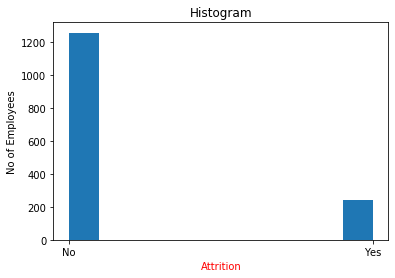

In [27]:
# Data Visualisation of Attrition

plt.hist(df2.Attrition)
plt.xlabel('Attrition', color = 'r')
plt.ylabel('No of Employees')
plt.title('Histogram')
plt.show()

The above graph shows that the no. of employees who attrited are less as compared to no. of employees who didn't attrite.

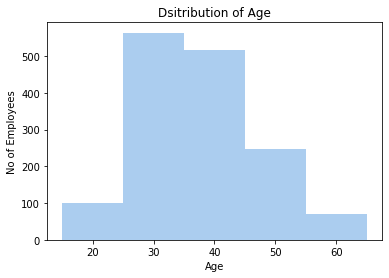

In [41]:
# Data Vizualisation of Age

bins = (15,25,35,45,55,65)
plt.hist(df2.Age, color = '#abcdef', bins = bins)
plt.xlabel('Age')
plt.ylabel('No of Employees')
plt.title('Dsitribution of Age')
plt.show()

From the above graph, we can conclude that the majority of the workforce are aged between 25 to 45 years of age

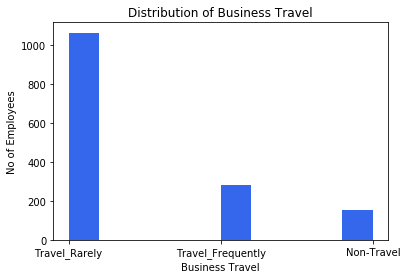

In [37]:
# Data Visualisation of Business Travel

plt.hist(df2.BusinessTravel, color = '#3467eb')
plt.xlabel('Business Travel')
plt.ylabel('No of Employees')
plt.title('Distribution of Business Travel')
plt.show()

From the above graph, we can conclude that the majority of the employees rarely travel for business

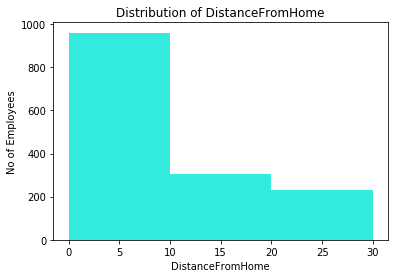

In [39]:
# Data Visualisation of DistanceFromHome

bins = (0,10,20,30)
plt.hist(df2.DistanceFromHome, color = "#34ebdf" , bins = bins)
plt.xlabel('DistanceFromHome')
plt.ylabel('No of Employees')
plt.title("Distribution of DistanceFromHome")
plt.show()

The above graph shows that majority of the employees live within 10 kms range from the work place.

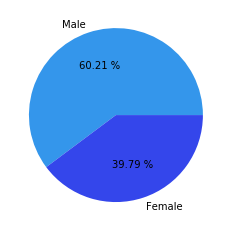

In [66]:
# Pie Chart of Gender

Male = df2.loc[df2["Gender"] == 'Male'].count()[0]
Female = df2.loc[df2["Gender"] == 'Female'].count()[0]

plt.pie([Male , Female], labels = ["Male" , "Female"], colors = ["#3496eb" , "#3446eb"], autopct = "%.2f %%")
plt.show()

The above graph shows that the male employees dominate the work force. But, overall, the company is doing good from a diversity perspective. There's still some scope for improvement.

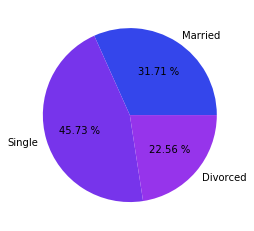

In [68]:
# Pie Chart of MaritalStatus

Married = df2.loc[df2["MaritalStatus"] == "Married"].count()[0]
Single = df2.loc[df2["MaritalStatus"] == "Single"].count()[0]
Divorced = df2.loc[df2["MaritalStatus"] == "Divorced"].count()[0]
labels = ["Married" , "Single" , "Divorced"]
colors = ["#3446eb" , "#7734eb" , "#9634eb"]
plt.pie([Single , Married , Divorced], labels = labels, colors = colors, autopct = "%.2f %%")
plt.show()

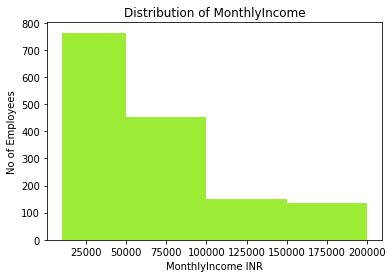

In [58]:
# Data Visualisation of MonthlyIncome

bins = (10000, 50000, 100000, 150000, 200000)
plt.hist(df2.MonthlyIncome, color = "#9ceb34" , bins = bins)
plt.xlabel('MonthlyIncome INR')
plt.ylabel('No of Employees')
plt.title("Distribution of MonthlyIncome")
plt.show()

Most of the employees salary ranges between INR 10000 to 100000.

In [ ]:
#Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       #'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       #'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       #'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       #'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      #dtype='object')

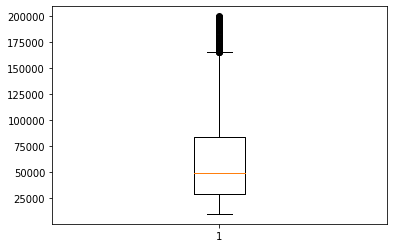

In [74]:
# Box plot of TotalWorkingYears and MonthlyIncome

plt.boxplot(df2.MonthlyIncome)
plt.show()

Monthly income acorss employees vary a lot, the above graph shows lot of outliers.

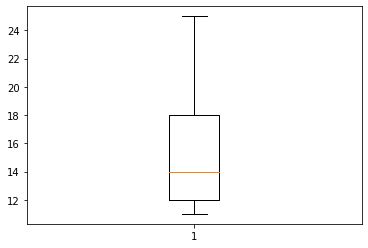

In [75]:
# Box plot of PercentSalaryHike

plt.boxplot(df2.PercentSalaryHike)
plt.show()

There are no outliers in % Salary hike.